# Event Cognition Knowledge Representation Demo

Juliet want its Personal AI to notify her every time she commutes and the rain probability is high.


For this the PAI needs three pieces of information:
- Rain probability for each hour
- Commuting probability for each hour
- And examples of hours with high notification probability

In [1]:
# Generate data
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

# Discrete time, sampled by hour
# One week, 168 hours
rain_probability = np.random.sample(168) # Probability of rain for each hour
commuting_probability = np.zeros(168) # Probability of starting the commuting for each hour
notification_probability = np.zeros(168) # Probability of notification for each hour

The PAI is already trained with the probabilities of commuting;

Juliet feeds the PAI with examples of moments of the previous week when she expect the PAI to show the notifications.

In this example she selects the hours when she is commuting and at the same time the probability of rain is higher than 50%.

In [2]:
for n in range(7):
    # Every morning Juliet is commuting
    commuting_probability[8+(24*n)] = 1.0
    # Juliet indicates on what hours
    # of this week she should be notified
    if rain_probability[8+(24*n)] > 0.5:
        notification_probability[8+(24*n)] = 1.0

She can see in the User Interface a graph showing the **Rain Probabilities** and the **Commuting Probabilities** through time over a week. And Juliet indicates with a simple touch the moments when she should have received a **Notification**

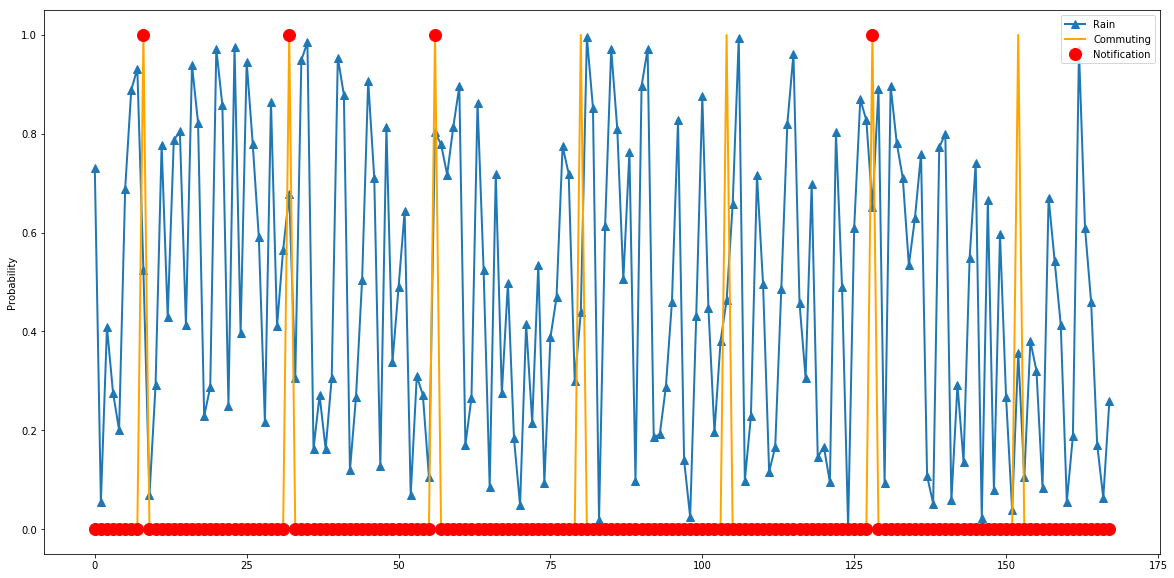

In [3]:
# Generate the plot
plt.rcParams['figure.figsize'] = (20,10)
plt.plot(rain_probability, label='Rain', linewidth=2, marker="^", markersize=8)
plt.plot(commuting_probability, color="orange", label='Commuting', linewidth=2)
plt.plot(notification_probability, color="red", label='Notification', marker='o', linestyle='none', markersize=12)
plt.ylabel('Probability')
plt.legend()
plt.show()
plt.close()

The PAI can now run a **Machine Learning** algorithm to learn, based on the **Commuting probability** and **Rain probability** when Juliet expects to be notified.

In this example the PAI uses a simple **Naive Bayes** approach. The data is discretized, in the interest of simplification.

In [4]:
# Fit the model
from sklearn.naive_bayes import BernoulliNB

# Discretization of the data
X = np.zeros((168, 2))
for n in range(168):
    for nn in range(2):
        X[n, nn] = 0
        if nn==0 and rain_probability[n] > .5:
            X[n, nn] = 1
        elif nn==1 and commuting_probability[n] > .5:
            X[n, nn] = 1

# Expected output
Y = notification_probability

# Fitting the model
clf = BernoulliNB()
clf.fit(X, Y)

BernoulliNB(alpha=1.0, binarize=0.0, class_prior=None, fit_prior=True)

Now that the PAI have learned, we can see how it performs in the next week.

In this example new **Rain probabilities** are generated.

In [5]:
# Test with new data

rain_probability = np.random.sample(168) # Probability of rain for each hour
commuting_probability = np.zeros(168) # Probability of starting the commuting for each hour
notification_probability = np.zeros(168) # Probability of notification for each hour


for n in range(7):
    commuting_probability[8+(24*n)] = 1.0

for n in range(168):
    discrete_rain = 0
    discrete_commuting = 0
    if rain_probability[n] > .5:
        discrete_rain = 1
    if commuting_probability[n] > .5:
        discrete_commuting = 1
    notification_probability[n] = clf.predict([[discrete_rain, discrete_commuting]])

In this graph you can see that the PAI is notifying Juliet (red dots) when the commiting probability is high (orange spike), and the rain probability is also high (blue line).

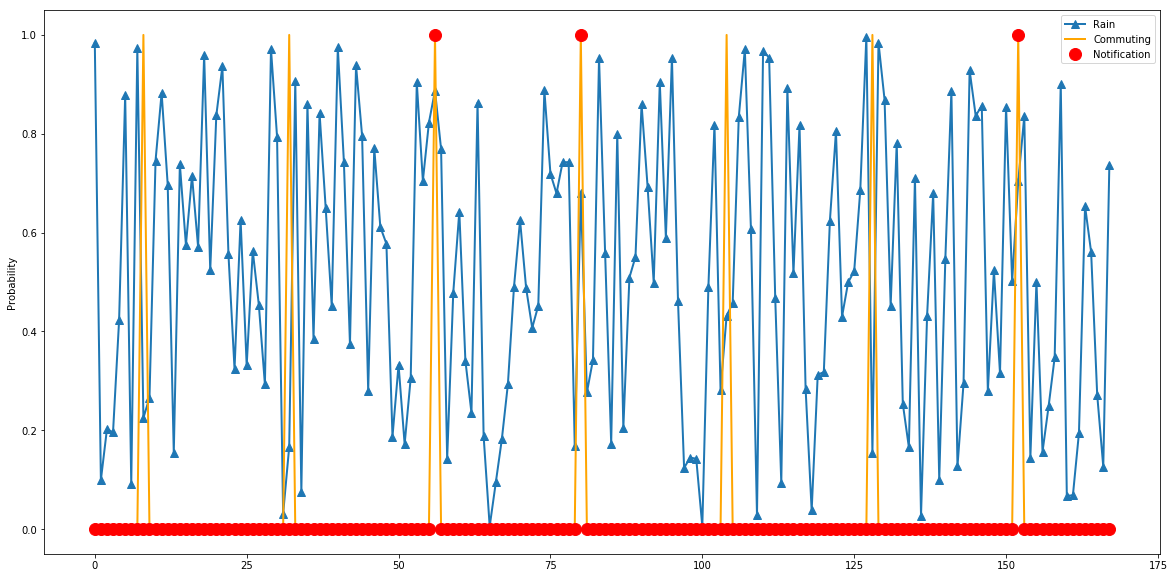

In [6]:
plt.rcParams['figure.figsize'] = (20,10)
plt.plot(rain_probability, label='Rain', linewidth=2, marker="^", markersize=8)
plt.plot(commuting_probability, color="orange", label='Commuting', linewidth=2)
plt.plot(notification_probability, color="red", label='Notification', marker='o', linestyle='none', markersize=12)
plt.ylabel('Probability')
plt.legend()
plt.show()
plt.close()